![](https://cdn.pixabay.com/photo/2017/01/09/12/49/mistake-1966448_960_720.jpg)

Is it possible to know if a new customer gonna be satisfied or not, basing on his personnal information such as : gender, age, type of travel ... ? <br>
<br>
To figure it out,first i explore the data " US Airline passenger satisfaction survey " , and second i use the machine learning classification technique called Logistic regression.

[1. Introduction : ](#Intro) <br>
[2. Exploration :](#Exp) <br>
[3. Normalize Data :](#Norm) <br>
[4. Train/Test Data set :](#T/T) <br>
[5. Modeling Logistic Regression :](#Mod) <br>
[6. Prediction using test set :](#Pre) <br>
[7. Evaluation :](#Eva) <br>
[8. Prediction using random data :](#Pre2) <br>





### **1. *Introduction* ** : <a id="Intro"></a> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.optimize as opt
from sklearn import preprocessing
import pylab as pl


In [2]:
df = pd.read_csv('../input/satisfaction_v2.csv')
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
satisfaction_v2                      129880 non-null object
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64

In [4]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
df.describe().round(2)

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,64940.50,39.43,1981.41,2.84,2.99,2.85,2.99,3.25,3.38,3.52,3.47,3.47,3.49,3.70,3.34,3.71,3.35,14.71,15.09
std,37493.27,15.12,1027.12,1.39,1.53,1.44,1.31,1.32,1.35,1.31,1.31,1.27,1.29,1.16,1.26,1.15,1.30,38.07,38.47
min,1.00,7.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,32470.75,27.00,1359.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,64940.50,40.00,1925.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,0.00,0.00
75%,97410.25,51.00,2544.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,5.00,5.00,4.00,5.00,4.00,12.00,13.00
max,129880.00,85.00,6951.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


### **2. *Exploration* :** <a id="Exp"></a> 

In [6]:
df['satisfaction_v2'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

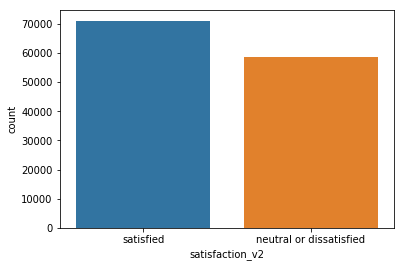

In [7]:
sns.countplot(x = 'satisfaction_v2', data = df, order = df['satisfaction_v2'].value_counts().index)
plt.xticks(rotation=0)

In [8]:
pd.crosstab(df['satisfaction_v2'], df['Age'], dropna=True, normalize='columns')

Age,7,8,9,10,11,12,13,14,15,16,...,72,73,74,75,76,77,78,79,80,85
satisfaction_v2,,,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,0.548905,0.590966,0.593714,0.593674,0.577061,0.554156,0.537221,0.581395,0.568588,0.57872,...,0.706827,0.641791,0.606557,0.657895,0.6,0.801887,0.681818,0.730769,0.718182,0.76
satisfied,0.451095,0.409034,0.406286,0.406326,0.422939,0.445844,0.462779,0.418605,0.431412,0.42128,...,0.293173,0.358209,0.393443,0.342105,0.4,0.198113,0.318182,0.269231,0.281818,0.24


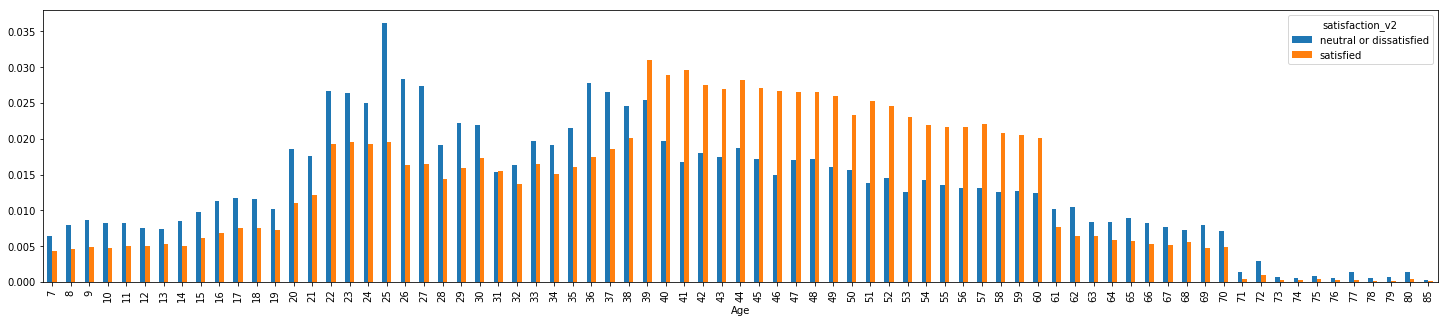

In [9]:
k = pd.crosstab(df['Age'],df['satisfaction_v2'], dropna=True, normalize='columns')
k.plot.bar(stacked=False, figsize=(25, 5))
plt.show()

In [10]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

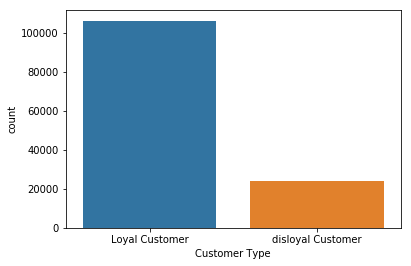

In [11]:
sns.countplot(x = 'Customer Type', data = df, order = df['Customer Type'].value_counts().index)
plt.xticks(rotation=0)

In [12]:
pd.crosstab(df['satisfaction_v2'], df['Customer Type'], dropna=True, normalize='columns')

Customer Type,Loyal Customer,disloyal Customer
satisfaction_v2,,
neutral or dissatisfied,0.383723,0.760303
satisfied,0.616277,0.239697


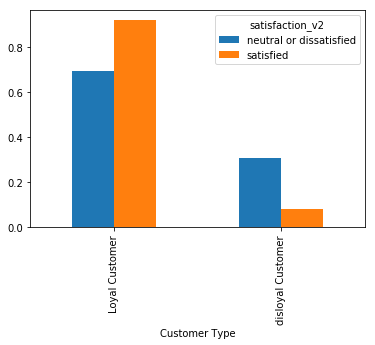

In [13]:
k = pd.crosstab(df['Customer Type'],df['satisfaction_v2'], dropna=True, normalize='columns')
k.plot.bar(stacked=False)
plt.show()

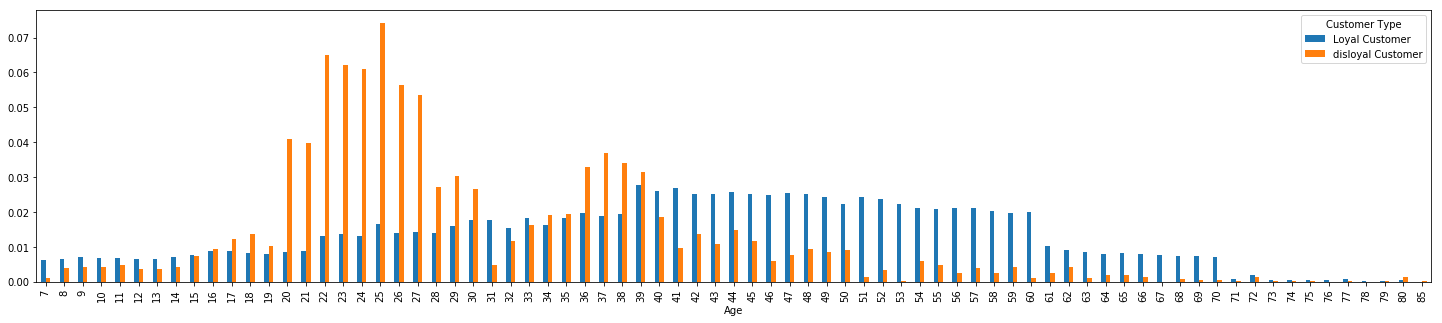

In [14]:
k = pd.crosstab(df['Age'],df['Customer Type'], dropna=True, normalize='columns')
k.plot.bar(stacked=False, figsize=(25, 5))
plt.show()

In [15]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

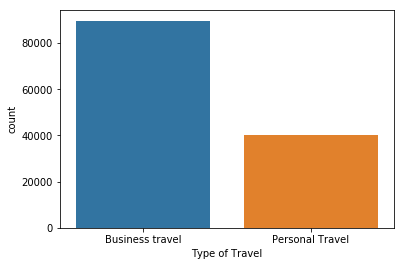

In [16]:
sns.countplot(x = 'Type of Travel', data = df, order = df['Type of Travel'].value_counts().index)
plt.xticks(rotation=0)

In [17]:
pd.crosstab(df['satisfaction_v2'], df['Type of Travel'], dropna=True, normalize='columns')

Type of Travel,Business travel,Personal Travel
satisfaction_v2,,
neutral or dissatisfied,0.416276,0.533904
satisfied,0.583724,0.466096


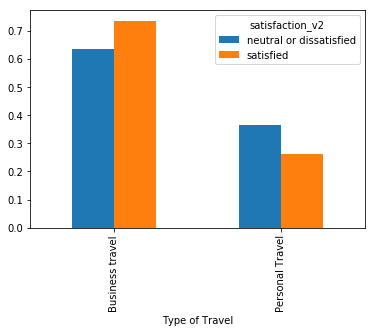

In [18]:
k = pd.crosstab(df['Type of Travel'],df['satisfaction_v2'], dropna=True, normalize='columns')
k.plot.bar(stacked=False)
plt.show()

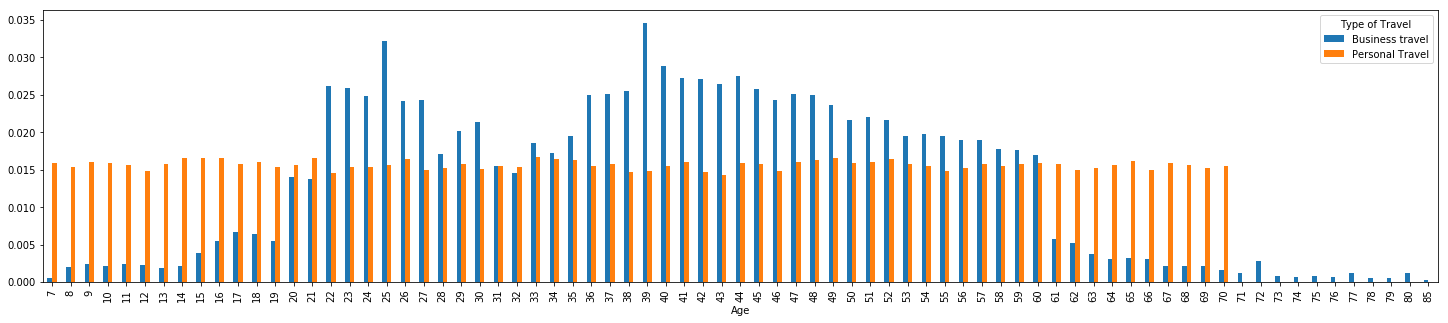

In [19]:
k = pd.crosstab(df['Age'],df['Type of Travel'], dropna=True, normalize='columns')
k.plot.bar(stacked=False, figsize=(25, 5))
plt.show()

In [20]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

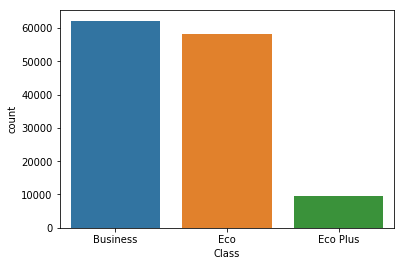

In [21]:
sns.countplot(x = 'Class', data = df, order = df['Class'].value_counts().index)
plt.xticks(rotation=0)

In [22]:
pd.crosstab(df['satisfaction_v2'], df['Class'], dropna=True, normalize='columns')

Class,Business,Eco,Eco Plus
satisfaction_v2,,,
neutral or dissatisfied,0.290621,0.606013,0.572947
satisfied,0.709379,0.393987,0.427053


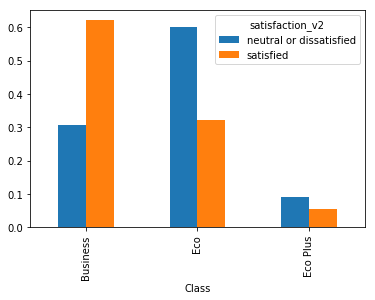

In [23]:
k = pd.crosstab(df['Class'],df['satisfaction_v2'], dropna=True, normalize='columns')
k.plot.bar(stacked=False)
plt.show()

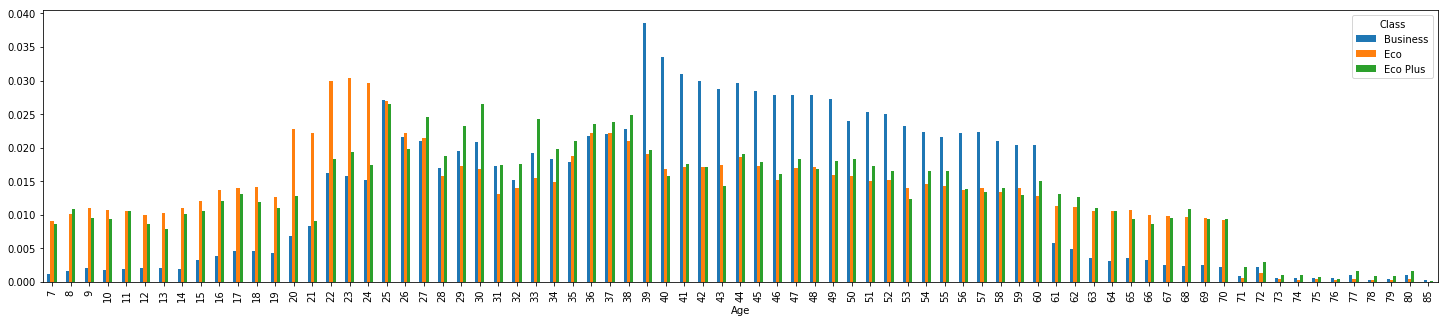

In [24]:
k = pd.crosstab(df['Age'],df['Class'], dropna=True, normalize='columns')
k.plot.bar(stacked=False, figsize=(25, 5))
plt.show()

In [25]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

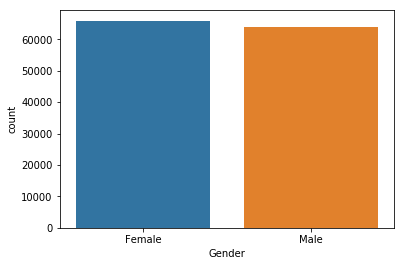

In [26]:
sns.countplot(x = 'Gender', data = df, order = df['Gender'].value_counts().index)
plt.xticks(rotation=0)

In [27]:
pd.crosstab(df['satisfaction_v2'], df['Gender'], dropna=True, normalize='columns')

Gender,Female,Male
satisfaction_v2,,
neutral or dissatisfied,0.348579,0.559885
satisfied,0.651421,0.440115


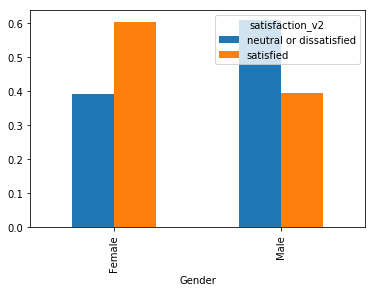

In [28]:
k = pd.crosstab(df['Gender'],df['satisfaction_v2'], dropna=True, normalize='columns')
k.plot.bar(stacked=False)
plt.show()

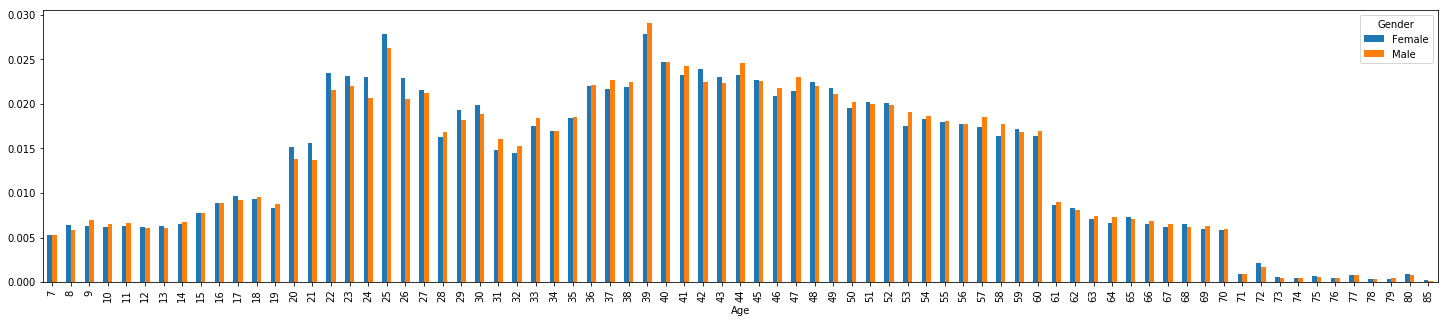

In [29]:
k = pd.crosstab(df['Age'],df['Gender'], dropna=True, normalize='columns')
k.plot.bar(stacked=False, figsize=(25, 5))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

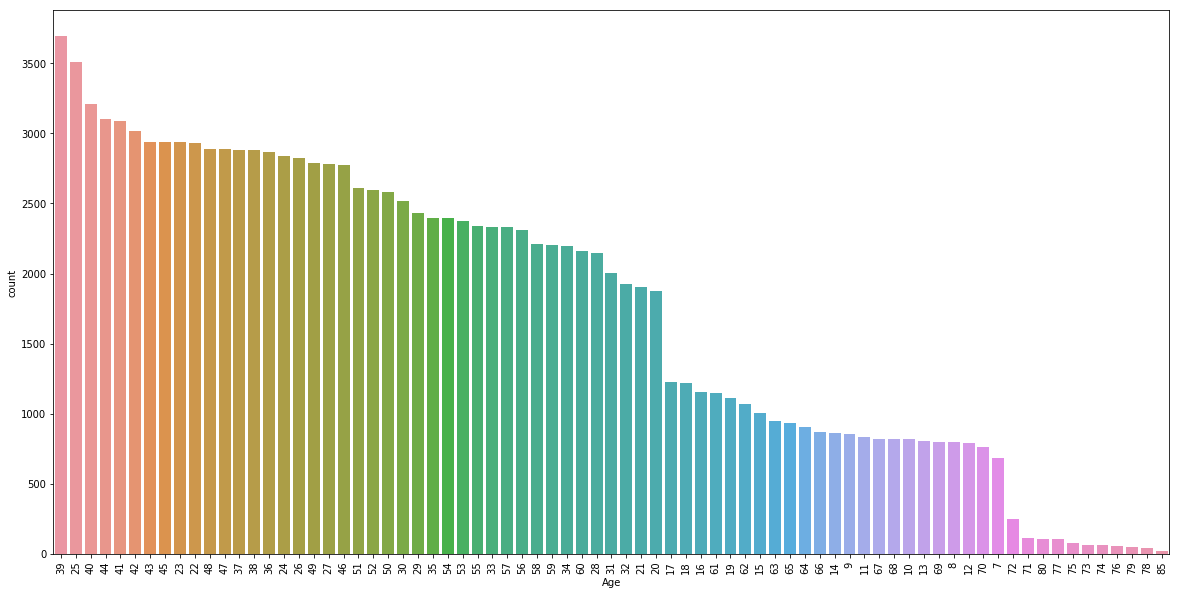

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)
plt.xticks(rotation=90)

In [31]:
df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0

df.satisfaction_v2[df.satisfaction_v2 == 'satisfied'] = 1
df.satisfaction_v2[df.satisfaction_v2 == 'neutral or dissatisfied'] = 0

df['Type of Travel'][df['Type of Travel'] == 'Personal Travel'] = 1
df['Type of Travel'][df['Type of Travel'] == 'Business travel'] = 0

df['Customer Type'][df['Customer Type'] == 'Loyal Customer'] = 1
df['Customer Type'][df['Customer Type'] == 'disloyal Customer'] = 0

df.Class[df.Class == 'Eco'] = 1
df.Class[df.Class == 'Business'] = 2
df.Class[df.Class == 'Eco Plus'] = 3

pd.options.mode.chained_assignment = None

df = df.apply(pd.to_numeric, errors='coerce')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/

In [32]:
df.head(1000)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,1,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,1,47,1,2,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,1,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,1,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,1,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19980,0,1,1,56,1,2,617,1,1,...,2,4,4,0,4,4,4,4,17,4.0
996,77412,1,0,1,30,1,1,1465,0,4,...,5,5,2,1,3,3,2,5,0,0.0
997,43906,1,0,1,13,1,1,1603,0,4,...,1,3,3,2,5,3,5,3,0,6.0
998,62269,1,0,1,27,1,3,3482,0,4,...,1,1,3,5,4,5,5,1,6,0.0


In [33]:
sat_df = df[['Age','Gender','Flight Distance','Customer Type','Class','satisfaction_v2']]
sat_df['satisfaction_v2'] = sat_df['satisfaction_v2'].astype('int')
sat_df.head()

,Age,Gender,Flight Distance,Customer Type,Class,satisfaction_v2
0,65,0,265,1,1,1
1,47,1,2464,1,2,1
2,15,0,2138,1,1,1
3,60,0,623,1,1,1
4,70,0,354,1,1,1


In [34]:
sat_df.shape

(129880, 6)

In [35]:
X = np.asarray(sat_df[['Age','Gender','Flight Distance','Customer Type','Class']])
X[0:5]

array([[  65,    0,  265,    1,    1],
       [  47,    1, 2464,    1,    2],
       [  15,    0, 2138,    1,    1],
       [  60,    0,  623,    1,    1],
       [  70,    0,  354,    1,    1]])

In [36]:
y = np.asarray(sat_df['satisfaction_v2'])
y[0:5]

array([1, 1, 1, 1, 1])

### **3. *Normalize data* : ** <a id="Norm"></a> 

In [37]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.69135082, -0.98533997, -1.6711027 ,  0.47342178, -1.01192253],
       [ 0.50081965,  1.01487815,  0.46985247,  0.47342178,  0.61101218],
       [-1.61568021, -0.98533997,  0.15245757,  0.47342178, -1.01192253],
       [ 1.36064772, -0.98533997, -1.32255247,  0.47342178, -1.01192253],
       [ 2.02205392, -0.98533997, -1.58445195,  0.47342178, -1.01192253]])

### ** 4. *Train / Test Data set* ** : <a id="T/T"></a> 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4 )
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (103904, 5) (103904,)
Test set: (25976, 5) (25976,)


### ** 5. *Modeling Logistic Regression*** : <a id="Mod"></a> 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### ** 6. *Prediction using test set* :**  <a id="Pre"></a> 

In [40]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, ..., 1, 1, 1])

In [41]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.59752535, 0.40247465],
       [0.43090297, 0.56909703],
       [0.57811532, 0.42188468],
       ...,
       [0.15092766, 0.84907234],
       [0.42864943, 0.57135057],
       [0.48090243, 0.51909757]])

### ** 7. *Evaluation* :**  <a id="Eva"></a> 

In [42]:
# Jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7397982753310748

In [43]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, 
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    if normalize : 
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[12096  2047]
 [ 4712  7121]]


Confusion matrix, without normalization
[[12096  2047]
 [ 4712  7121]]


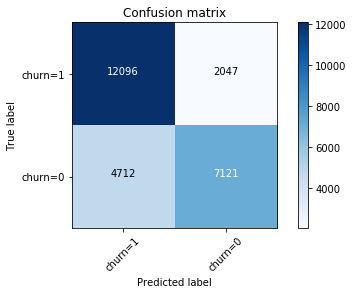

In [44]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False, title='Confusion matrix')

In [45]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68     11833
           1       0.72      0.86      0.78     14143

    accuracy                           0.74     25976
   macro avg       0.75      0.73      0.73     25976
weighted avg       0.75      0.74      0.73     25976



In [46]:
# Log Loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6041076056554491

### ** 8. *Prediction using random data* :**  <a id="Pre2"></a> 

In [47]:
a = 19
k =  0
ds = 2051
ct = 1
cs = 2

In [48]:
from sklearn.preprocessing import Normalizer
# g = np.reshape(1,-1)
g= np.array([[a,k,ds,ct,cs]])
# g = preprocessing.StandardScaler().fit(g).transform(g)
# g = preprocessing.StandardScaler().fit(g.reshape(1, -1)).transform(g.reshape(1, -1))
Z = preprocessing.Normalizer().fit(g.reshape(1, -1))
Z

Normalizer(copy=True, norm='l2')

In [49]:
B = Z.transform(g)
B

array([[9.26e-03, 0.00e+00, 1.00e+00, 4.88e-04, 9.75e-04]])

In [50]:
y_prob = LR.predict(B)
y_prob

array([1])

In [51]:
y_prob = LR.predict_proba(B)
y_prob


array([[0.46, 0.54]])